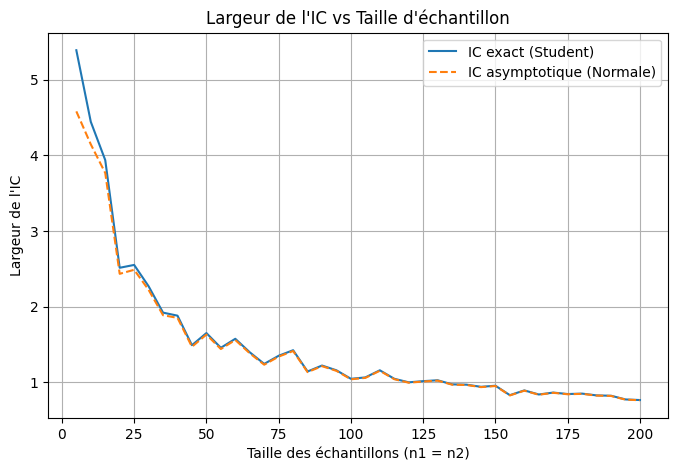

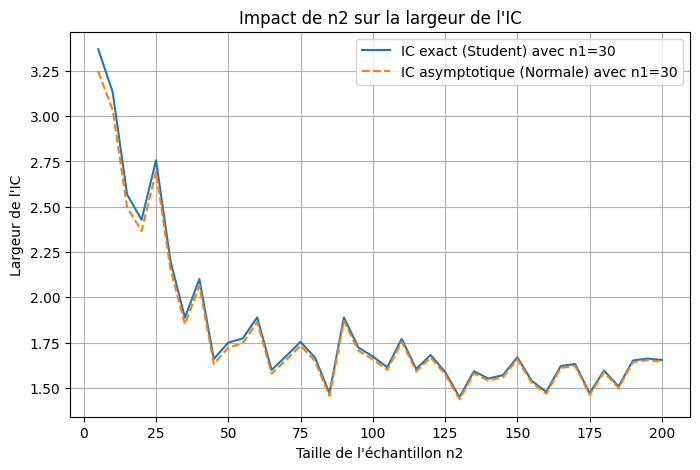

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Paramètres de simulation
mu1, mu2 = 5, 5.5       # moyennes
sigma = 2               # écart-type commun
alpha = 0.05

def ic_difference_moyennes(n1, n2):
    """
    Calcule la largeur de l'IC exact et asymptotique pour la différence de moyennes
    dans le cas variances égales.
    """
    # Simuler les données
    X1 = np.random.normal(mu1, sigma, n1)
    X2 = np.random.normal(mu2, sigma, n2)
    
    # Moyennes et variances
    mean1, mean2 = np.mean(X1), np.mean(X2)
    var1, var2 = np.var(X1, ddof=1), np.var(X2, ddof=1)
    
    # Variance combinée (pooled)
    sp2 = ((n1-1)*var1 + (n2-1)*var2) / (n1 + n2 - 2)
    se = np.sqrt(sp2 * (1/n1 + 1/n2))
    
    # IC exact (Student)
    t_crit = stats.t.ppf(1 - alpha/2, df=n1 + n2 - 2)
    ic_exact = (mean1 - mean2 - t_crit*se, mean1 - mean2 + t_crit*se)
    
    # IC asymptotique (Normale)
    z_crit = stats.norm.ppf(1 - alpha/2)
    ic_asym = (mean1 - mean2 - z_crit*se, mean1 - mean2 + z_crit*se)
    
    return ic_exact, ic_asym

# n1 = n2 variable
n_values = range(5, 201, 5)
width_exact, width_asym = [], []

for n in n_values:
    ic_e, ic_a = ic_difference_moyennes(n, n)
    width_exact.append(ic_e[1] - ic_e[0])
    width_asym.append(ic_a[1] - ic_a[0])

plt.figure(figsize=(8,5))
plt.plot(n_values, width_exact, label="IC exact (Student)")
plt.plot(n_values, width_asym, label="IC asymptotique (Normale)", linestyle="--")
plt.xlabel("Taille des échantillons (n1 = n2)")
plt.ylabel("Largeur de l'IC")
plt.title("Largeur de l'IC vs Taille d'échantillon")
plt.legend()
plt.grid(True)
plt.show()

# n1 fixe, n2 variable
n1_fixed = 30
n2_values = range(5, 201, 5)
width_exact_varn2, width_asym_varn2 = [], []

for n2 in n2_values:
    ic_e, ic_a = ic_difference_moyennes(n1_fixed, n2)
    width_exact_varn2.append(ic_e[1] - ic_e[0])
    width_asym_varn2.append(ic_a[1] - ic_a[0])

plt.figure(figsize=(8,5))
plt.plot(n2_values, width_exact_varn2, label=f"IC exact (Student) avec n1={n1_fixed}")
plt.plot(n2_values, width_asym_varn2, label=f"IC asymptotique (Normale) avec n1={n1_fixed}", linestyle="--")
plt.xlabel("Taille de l'échantillon n2")
plt.ylabel("Largeur de l'IC")
plt.title("Impact de n2 sur la largeur de l'IC")
plt.legend()
plt.grid(True)
plt.show()


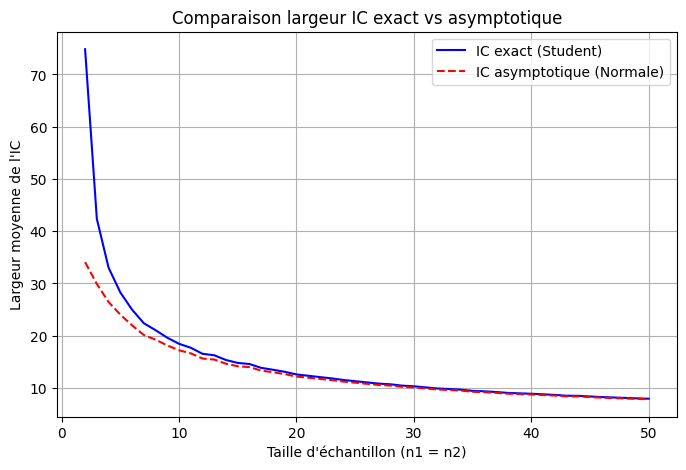

In [ ]:
from scipy.stats import t, norm

# Paramètres de simulation
mu1, mu2 = 50, 55       # moyennes des populations
sigma = 10              # écart-type commun (assez grand pour voir l'effet)
alpha = 0.05
n_sim = 500             # nombre de répétitions pour lisser les résultats

# Listes pour stocker les résultats
n_values = np.arange(2, 51)  # tailles d'échantillon de 2 à 50
width_exact = []
width_asympt = []

# Boucle sur les tailles d'échantillon
for n in n_values:
    widths_exact_sim = []
    widths_asympt_sim = []
    
    for _ in range(n_sim):
        # Génération des deux échantillons
        X1 = np.random.normal(mu1, sigma, n)
        X2 = np.random.normal(mu2, sigma, n)

        # Moyennes et variances
        mean_diff = np.mean(X1) - np.mean(X2)
        s1_sq, s2_sq = np.var(X1, ddof=1), np.var(X2, ddof=1)

        # Variance poolée
        s_p = np.sqrt(((n-1)*s1_sq + (n-1)*s2_sq) / (2*n - 2))
        se = s_p * np.sqrt(1/n + 1/n)

        # IC exact (Student)
        t_crit = t.ppf(1 - alpha/2, df=2*n - 2)
        ci_exact = (mean_diff - t_crit*se, mean_diff + t_crit*se)
        widths_exact_sim.append(ci_exact[1] - ci_exact[0])

        # IC asymptotique (Normale)
        z_crit = norm.ppf(1 - alpha/2)
        ci_asympt = (mean_diff - z_crit*se, mean_diff + z_crit*se)
        widths_asympt_sim.append(ci_asympt[1] - ci_asympt[0])
    
    # Moyenne des largeurs sur toutes les simulations
    width_exact.append(np.mean(widths_exact_sim))
    width_asympt.append(np.mean(widths_asympt_sim))

# Tracé des résultats
plt.figure(figsize=(8,5))
plt.plot(n_values, width_exact, label="IC exact (Student)", color="blue")
plt.plot(n_values, width_asympt, label="IC asymptotique (Normale)", color="red", linestyle="--")
plt.xlabel("Taille d'échantillon (n1 = n2)")
plt.ylabel("Largeur moyenne de l'IC")
plt.title("Comparaison largeur IC exact vs asymptotique")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
from scipy import stats

def ic_diff_moyennes(x1, x2, alpha=0.05):
    n1, n2 = len(x1), len(x2)
    m1, m2 = np.mean(x1), np.mean(x2)
    s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)
    
    # Variance combinée (supposée égale)
    sp2 = ((n1-1)*s1 + (n2-1)*s2) / (n1 + n2 - 2)
    
    # Erreur standard
    se = np.sqrt(sp2 * (1/n1 + 1/n2))
    
    # Quantile t
    t_quantile = stats.t.ppf(1 - alpha/2, df=n1 + n2 - 2)
    
    # Intervalle de confiance
    diff = m1 - m2
    lower = diff - t_quantile * se
    upper = diff + t_quantile * se
    
    return diff, (lower, upper)

def test_significativite(intervalle):
    lower, upper = intervalle
    if lower > 0 or upper < 0:
        return "Différence significative (0 en dehors de l'intervalle)"
    else:
        return "Pas de différence significative (0 dans l'intervalle)"

# Exemple 1 : petits échantillons
np.random.seed(42)
x1_small = np.random.normal(10, 2, size=10)
x2_small = np.random.normal(11, 2, size=8)

diff1, ic1 = ic_diff_moyennes(x1_small, x2_small)
print("Petit échantillon:")
print(f"Différence moyenne: {diff1:.3f}")
print(f"Intervalle de confiance: [{ic1[0]:.3f}, {ic1[1]:.3f}]")
print(test_significativite(ic1))
print()

# Exemple 2 : échantillons plus grands
x1_large = np.random.normal(10, 2, size=100)
x2_large = np.random.normal(11, 2, size=80)

diff2, ic2 = ic_diff_moyennes(x1_large, x2_large)
print("Grand échantillon:")
print(f"Différence moyenne: {diff2:.3f}")
print(f"Intervalle de confiance: [{ic2[0]:.3f}, {ic2[1]:.3f}]")
print(test_significativite(ic2))


Petit échantillon:
Différence moyenne: 1.293
Intervalle de confiance: [-0.246, 2.832]
Pas de différence significative (0 dans l'intervalle)

Grand échantillon:
Différence moyenne: -1.314
Intervalle de confiance: [-1.866, -0.762]
Différence significative (0 en dehors de l'intervalle)


In [13]:
import numpy as np
import pandas as pd
from scipy.stats import t, norm

# Paramètres
mu1, mu2 = 50, 55       # vraies moyennes
sigma = 10              # écart-type commun
alpha = 0.05
n_sim = 1000            # nombre de simulations pour chaque taille

# Tailles d'échantillon à tester
n_values = [3, 5, 10, 30, 50]

# Stockage des résultats
results = []

for n in n_values:
    contain_exact = 0
    contain_asympt = 0
    true_diff = mu1 - mu2  # valeur réelle

    for _ in range(n_sim):
        # Génération des échantillons
        X1 = np.random.normal(mu1, sigma, n)
        X2 = np.random.normal(mu2, sigma, n)

        # Moyennes et variances
        mean_diff = np.mean(X1) - np.mean(X2)
        s1_sq = np.var(X1, ddof=1)
        s2_sq = np.var(X2, ddof=1)

        # Variance poolée
        s_p = np.sqrt(((n - 1) * s1_sq + (n - 1) * s2_sq) / (2 * n - 2))
        se = s_p * np.sqrt(1 / n + 1 / n)

        # IC exact (Student)
        t_crit = t.ppf(1 - alpha / 2, df=2 * n - 2)
        ci_exact = (mean_diff - t_crit * se, mean_diff + t_crit * se)

        # IC asymptotique (Normale)
        z_crit = norm.ppf(1 - alpha / 2)
        ci_asympt = (mean_diff - z_crit * se, mean_diff + z_crit * se)

        # Vérification de couverture
        if ci_exact[0] <= true_diff <= ci_exact[1]:
            contain_exact += 1
        if ci_asympt[0] <= true_diff <= ci_asympt[1]:
            contain_asympt += 1

    # Stocker les proportions
    results.append({
        "Taille n1=n2": n,
        "Couverture IC exact (%)": contain_exact / n_sim * 100,
        "Couverture IC asymptotique (%)": contain_asympt / n_sim * 100
    })

# Affichage sous forme de tableau
df_results = pd.DataFrame(results)
print(df_results)


   Taille n1=n2  Couverture IC exact (%)  Couverture IC asymptotique (%)
0             3                     95.0                            87.9
1             5                     95.3                            90.9
2            10                     94.8                            93.6
3            30                     96.2                            96.0
4            50                     95.6                            95.4
